In [50]:
from utils import *
import os
import numpy as np
from griffin_lim import *
import matplotlib.pyplot as plt

## Audio MNIST

### Load Random Spectrogram created from the iDLG model

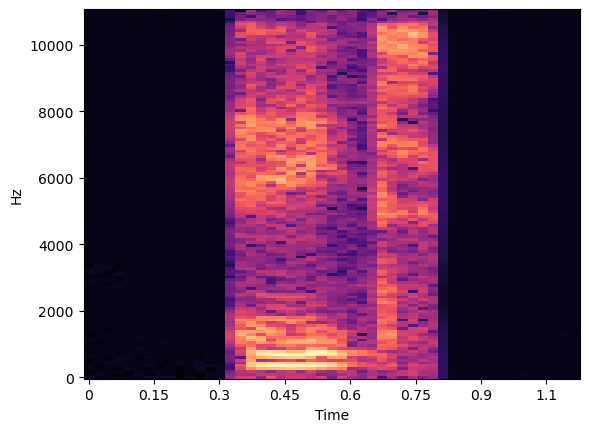

In [51]:
folder_path = "results_mat/iDLG_audio_mnist"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

spec_db = np.load(f'{folder_path}/{sample_file[0]}')

sr = 8000
img = librosa.display.specshow(spec_db[0][0], x_axis='time', y_axis='linear', fmax=sr//2, fmin=0, cmap='magma')

### Reconstrunct signal in time-domain

In [52]:
inverse_spec = np.array(10**(spec_db[0][0]/20))

win_size = 256
hop = 128
win = 'hamming'


y_reconstructed = mfgla(inverse_spec, iterations=1000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None }
                        , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None })

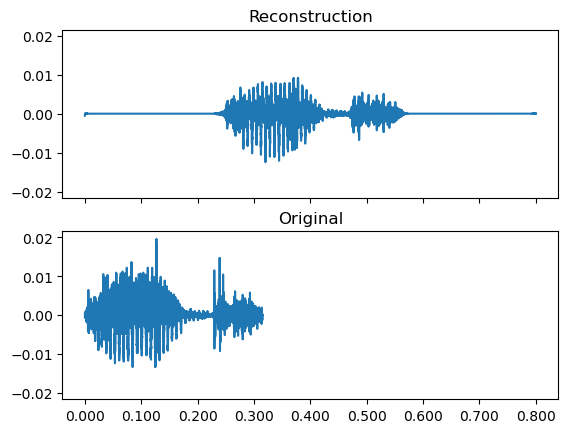

In [53]:
folder_path = "data/audioMNIST/data"
y, sr = librosa.load(folder_path + "/" + sample_file[0].replace("npy","wav"), sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(y_reconstructed, sr=sr, ax=ax[0])
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[0].set(title='Reconstruction', xlabel=None)
ax[0].label_outer()
ax[1].set(title='Original', xlabel=None)
ax[1].label_outer()

In [54]:
import soundfile as sf
sf.write('results_audio/audio_mnist/' + sample_file[0].replace("npy","wav"), y_reconstructed, sr) # Save as WAV file

## Urbansound

### Load Random Spectrogram created from the iDLG model

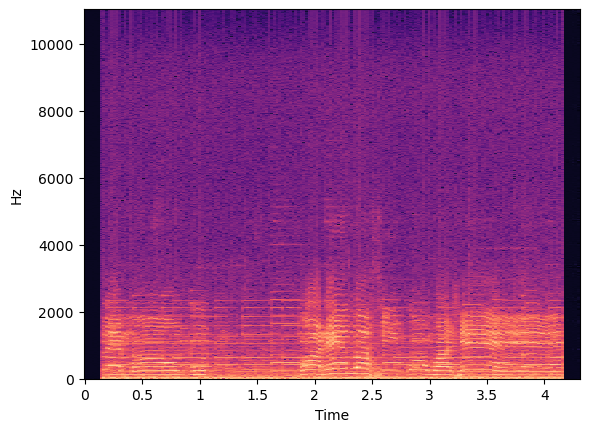

In [15]:
folder_path = "results_mat/iDLG_urbansound"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

spec_db = np.load(f'{folder_path}/{sample_file[0]}')
sr = 44100
img = librosa.display.specshow(spec_db[0][0], x_axis='time', y_axis='linear', fmax=sr//2, fmin=0, cmap='magma')

### Reconstrunct signal in time-domain

In [16]:
inverse_spec = np.array(10**(spec_db[0][0]/20))

win_size = 2048
hop = 1024
win = 'hamming'

y_reconstructed = mfgla(inverse_spec, iterations=1000, stft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None }
                        , istft_kwargs={'n_fft': win_size, 'hop_length': hop, 'window' : win, 'center' : None })

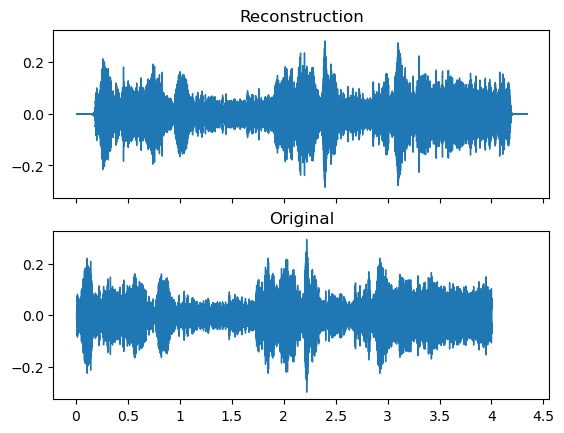

In [17]:
folder_path = "data/audio/"
for dir, _ , files in os.walk(folder_path):
    if sample_file[0].replace("npy","wav") in files:
        folder_path = dir
        break
y, sr = librosa.load(folder_path + "/" + sample_file[0].replace("npy","wav"), sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(y_reconstructed, sr=sr, ax=ax[0])
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[0].set(title='Reconstruction', xlabel=None)
ax[0].label_outer()
ax[1].set(title='Original', xlabel=None)
ax[1].label_outer()

In [ ]:
import soundfile as sf
sf.write('results_audio/urbansound/' + sample_file[0].replace("npy","wav"), y_reconstructed, sr) # Save the reconstructed audio